In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['font.family'] = ['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 한강 및 주요지천 수질 측정 자료\*.csv')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 한강 및 주요지천 수질 측정 자료\\서울시 한강 및 주요지천 수질 측정 자료.csv']

In [5]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,날짜,시간,측정소명,수온,pH,용존산소,총질소,총인,총유기탄소,페놀,시안
0,20221215,12:00,탄천,7.0,7.2,12.5,6.760,0.025,3.3,0.0,0.0
1,20221215,12:00,중랑천,3.6,6.9,12.0,6.375,0.100,1.9,0.0,0.0
2,20221215,12:00,안양천,7.7,7.2,10.0,10.410,0.130,3.8,0.0,0.0
3,20221215,12:00,선유,5.6,7.3,13.4,4.320,0.034,2.8,0.0,0.0
4,20221215,12:00,노량진,5.6,7.3,12.5,3.970,0.034,2.5,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      3660 non-null   int64  
 1   시간      3660 non-null   object 
 2   측정소명    3660 non-null   object 
 3   수온      3660 non-null   object 
 4   pH      3660 non-null   object 
 5   용존산소    3660 non-null   object 
 6   총질소     3660 non-null   object 
 7   총인      3660 non-null   object 
 8   총유기탄소   3660 non-null   object 
 9   페놀      3660 non-null   float64
 10  시안      3660 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 314.7+ KB


In [7]:
df.describe()

,날짜,페놀,시안
count,3.660000e+03,3660.0,3660.0
mean,2.022116e+07,0.0,0.0
std,4.281192e+01,0.0,0.0
min,2.022112e+07,0.0,0.0
25%,2.022112e+07,0.0,0.0
50%,2.022113e+07,0.0,0.0
75%,2.022121e+07,0.0,0.0
max,2.022122e+07,0.0,0.0


In [8]:
df.describe(include=np.object)

,시간,측정소명,수온,pH,용존산소,총질소,총인,총유기탄소
count,3660,3660,3660,3660,3660,3660,3660,3660
unique,24,5,155,24,101,522,109,70
top,12:00,탄천,13.7,7.1,11.8,점검중,0.035,2.8
freq,155,732,129,1117,144,289,419,477


In [9]:
df.isnull().sum()

날짜       0
시간       0
측정소명     0
수온       0
pH       0
용존산소     0
총질소      0
총인       0
총유기탄소    0
페놀       0
시안       0
dtype: int64

**각 물질의 분포는?**

**각 물질의 시간별/날짜별 평균 분포는?**

**각 측정소별 물질의 평균 측정값은?**

## 전처리

In [14]:
df.drop(['페놀','시안'],axis=1, inplace=True)

In [16]:
def check_null(x):
    if x=='점검중':
        return '0'
    else:
        return x

for c in df:
    df[c] = df[c].apply(check_null)

In [20]:
cols = ['수온','pH','용존산소','총질소','총인','총유기탄소']

for c in cols:
    df = df.astype({c:'float'})

In [26]:
def time_convert(x):
    return int(x[:2])

df['시간'] = df['시간'].apply(time_convert)

## 시각화

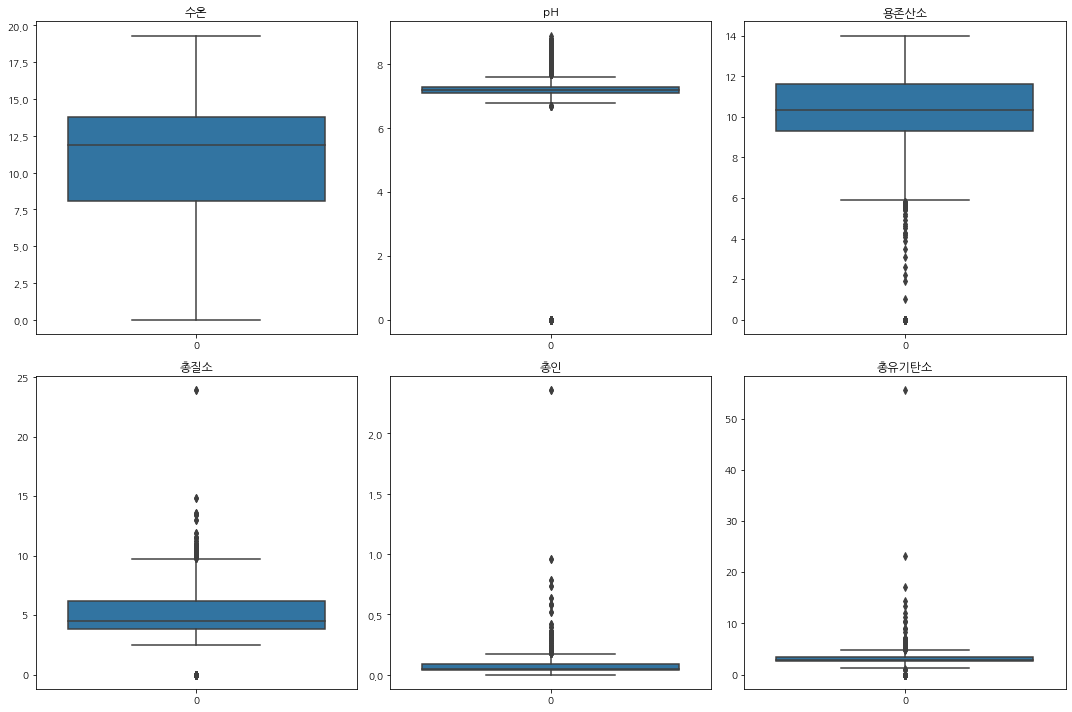

In [31]:
fig,axes = plt.subplots(2,3,figsize=(15,10))

for i in range(6):
    ax = axes[i//3][i%3]
    sns.boxplot(data=df[cols[i]],ax=ax).set(title=cols[i])
plt.tight_layout()

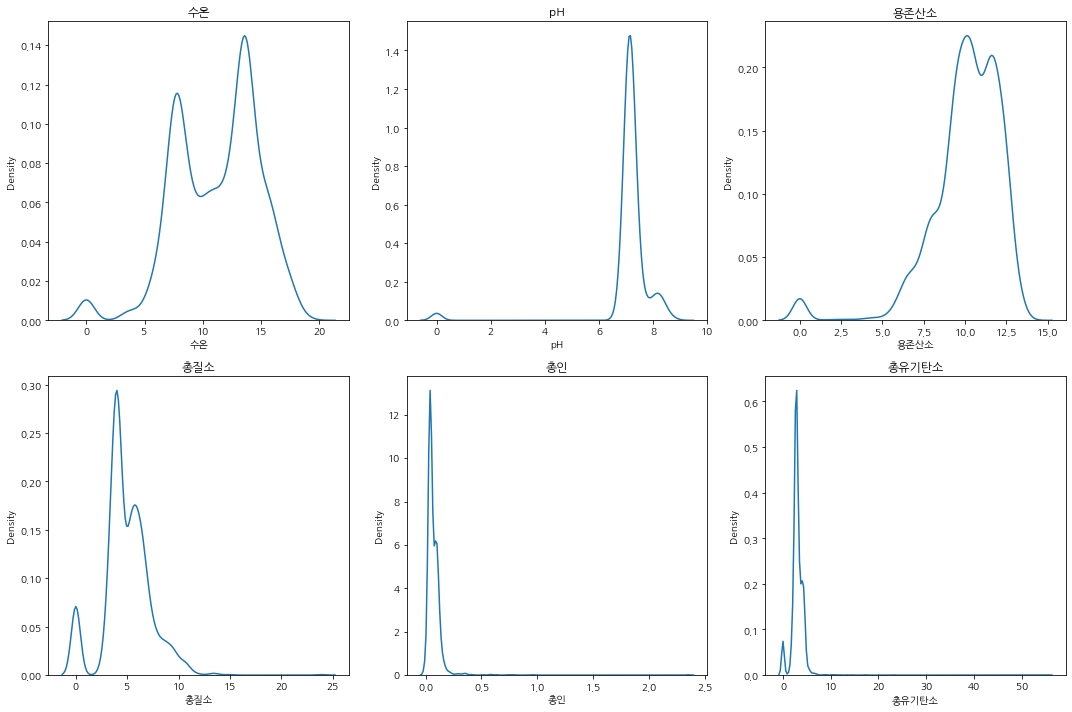

In [32]:
fig,axes = plt.subplots(2,3,figsize=(15,10))

for i in range(6):
    ax = axes[i//3][i%3]
    sns.kdeplot(data=df[cols[i]],ax=ax).set(title=cols[i])
plt.tight_layout()

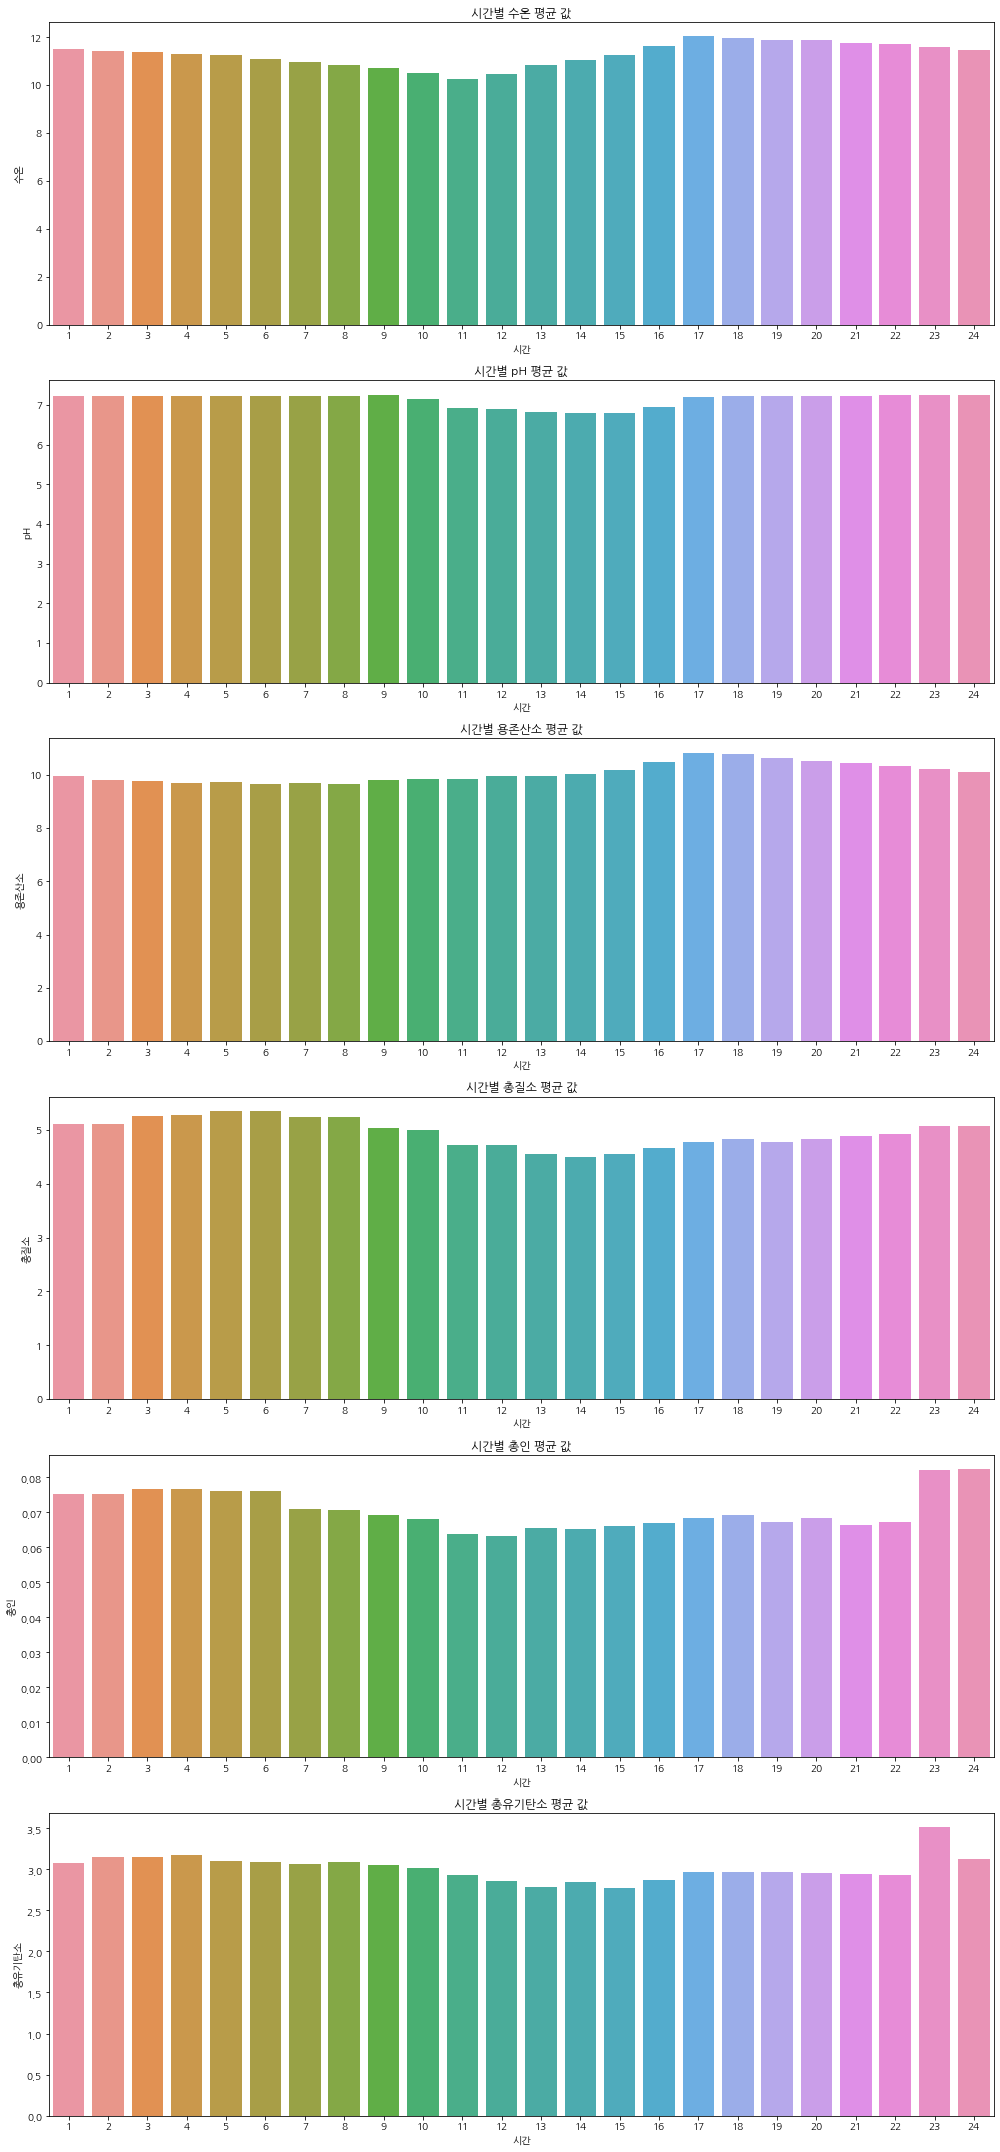

In [41]:
fig,axes = plt.subplots(6,1,figsize=(14,30))

for i,c in enumerate(cols):
    sub_df = df.groupby(by=['시간'],as_index=False)[c].mean()
    sns.barplot(data=sub_df, x='시간', y=c,ax=axes[i]).set(title=f'시간별 {c} 평균 값')
plt.tight_layout()

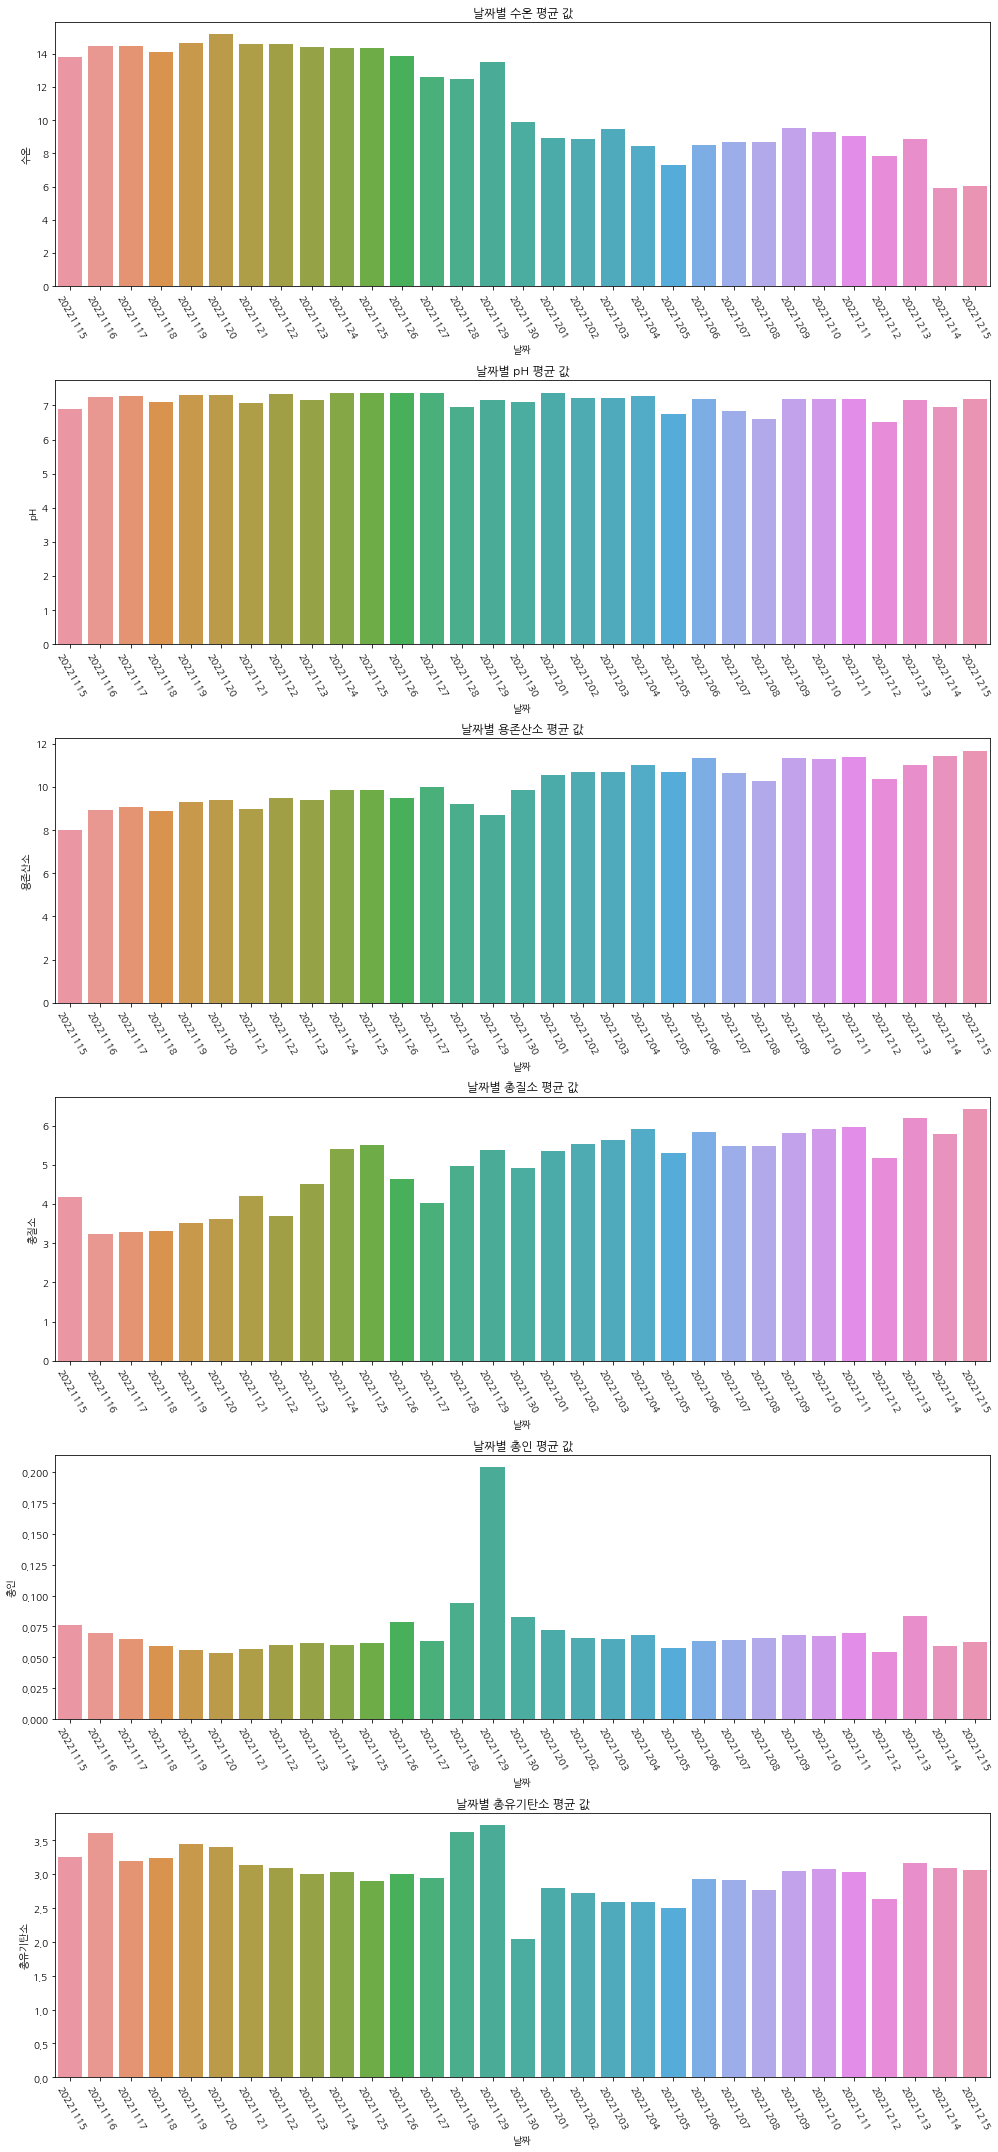

In [44]:
fig,axes = plt.subplots(6,1,figsize=(14,30))
dat_cols = sorted(df['날짜'].unique())
for i,c in enumerate(cols):
    sub_df = df.groupby(by=['날짜'],as_index=False)[c].mean()
    sns.barplot(data=sub_df, x='날짜', y=c,ax=axes[i]).set(title=f'날짜별 {c} 평균 값')
    o = axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=-60)
plt.tight_layout()

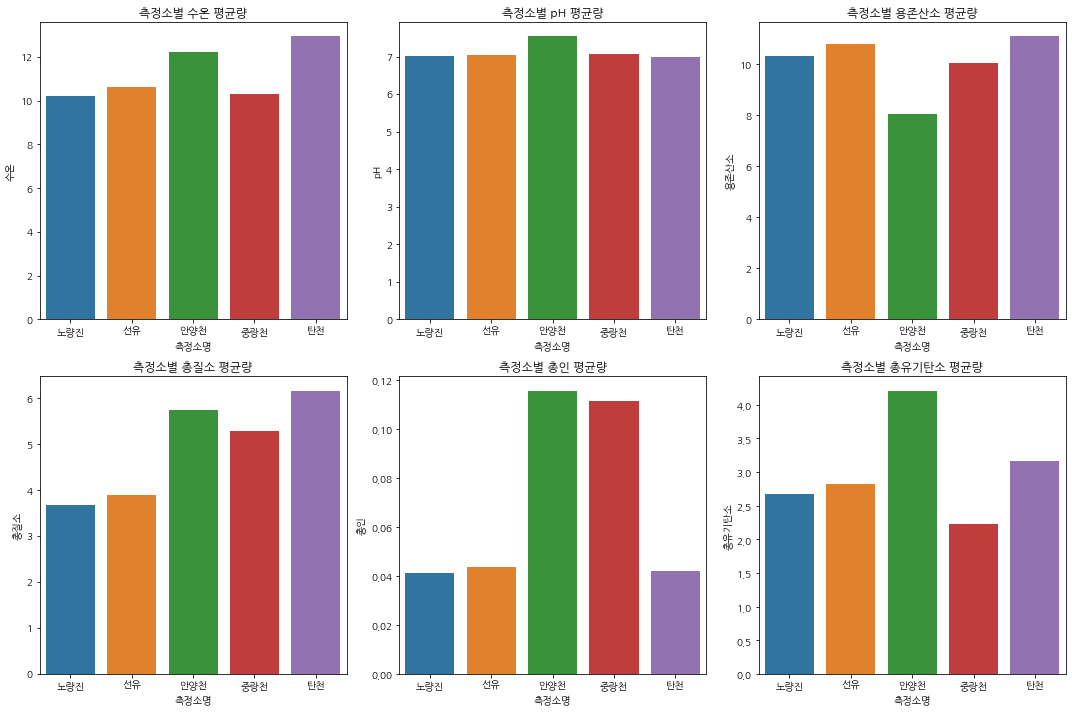

In [47]:
fig,axes = plt.subplots(2,3,figsize=(15,10))

for i,c in enumerate(cols):
    ax = axes[i//3][i%3]
    sub_df = df.groupby(by=['측정소명'],as_index=False)[c].mean()
    sns.barplot(data=sub_df, x='측정소명', y=c, ax=ax).set(title=f'측정소별 {c} 평균량')

plt.tight_layout()

**각 물질의 분포는?**

수온의 경우 큰 이상치 없이 분포가 안정적이지만 나머지 요소들은 큰 이상치가 어느정도 포함되어 있다.

**각 물질의 시간별/날짜별 평균 분포는?**

- 수온은 11시부터 온도가 상승하다 17시를 기점으로 다시 온도가 내려간다. 날짜가 지남에 따라 수온값이 감소하는 추세다.

- ph값은 오전-오후 시간대에 평균값이 낮고 저녁-새벽 시간에 평균 값이 높다. 날짜와 상관없이 비슷한 값을 가진다.

- 용존산소는 8시부터 증가하다 17시를 기점으로 다시 내려간다. 날짜가 지남에 따라 값이 증가하는 추세다.

- 질소는 5시부터 감소하다 14시부터 다시 증가한다. 날짜가 지남에 따라 값이 증가하는 추세다

- 총인은 오전-저녁 시간대에 평균값이 낮고 밤-새벽 시간에 평균 값이 높다. 11월 29일에만 특히 높고 비슷하게 분포한다.

- 총유기탄소는 밤 시간대에 큰 값을 가지고 다른 시간대는 비슷하다. 날짜와 상관없이 비슷한 값을 가진다.

**각 측정소별 물질의 평균 측정값은?**

- 수온은 안양천과 탄천이 높고 나머지는 비슷하다.

- ph값은 측정소간 큰 차이가 없다.

- 용존산소는 안양천이 크게 낮고 나머지는 비슷하다.

- 총질소는 노량진과 선유가 낮고 나머지는 비슷하다.

- 총인은 안양천과 중랑천이 크게 높고 나머지는 비슷하다.

- 총유기탄소는 안양천이 크게 높고 나머지는 비슷하다.

## 분석 결과에 대한 생각

- 날짜가 지나면서 추워지는 것을 생각하면 수온,용존산소,질소는 온도의 영향을 크게 받는 것 같다.

- 용존산소와 질소가 시간에 따른 변화 양상이 비슷하다는 점을 고려해봤을 때 둘 사이에 밀접한 연관성이 있는 것으로 보인다. 동식물의 대사 주기와도 연관이 있을 것 같다.

- 장소별로 각 요소들이 상이한 값을 가지는데, 주변 환경 요소들을 좀 더 파악한다면 수질 관리 및 예측에 활용할 수 있을 것 같다.